In [1]:
import tensorflow as tf
from timeit import default_timer as timer
import warnings
from utils import get_data_extract
from matplotlib import pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import LSHForest
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import ParameterGrid
from scipy.stats import mode
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.nn import relu, softmax
from tensorflow.train import GradientDescentOptimizer

In [2]:
tf.logging.set_verbosity(tf.logging.ERROR)
warnings.filterwarnings('ignore')

# MNIST Classification

## Problem 0

Load the MNIST data set.

In [3]:
X_train, Y_train, X_val, Y_val, X_test, Y_test = get_data_extract()

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


### Part A

The dimensions of the data segments are as follows,

In [4]:
print(f"Training Images Shape: {X_train.shape}")

Training Images Shape: (16500, 784)


In [5]:
print(f"Validation Images Shape: {X_val.shape}")

Validation Images Shape: (1500, 784)


In [6]:
print(f"Test Images Shape: {X_test.shape}")

Test Images Shape: (3000, 784)


### Part B

The first two images in the training set are,

First Image:


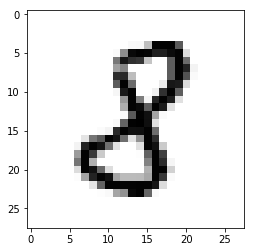

In [7]:
print("First Image:")
_ = plt.imshow(X_train[0].reshape(28, 28), cmap="Greys")

Second Image:


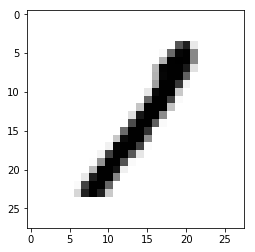

In [8]:
print("Second Image:")
_ = plt.imshow(X_train[1].reshape(28, 28), cmap="Greys")

### Part C

The first two labels in the training set are,

In [9]:
print(f"First Label: {Y_train[0]}")

First Label: 8


In [10]:
print(f"Second Label: {Y_train[1]}")

Second Label: 1


## Problem 1

Here we attempt to use linear discriminant analysis to classify the MNIST digits.

### Part A

We create a `LinearDiscriminatAnalysis` model using scikit-learn.

In [11]:
lda_model = LinearDiscriminantAnalysis()

Now we fit the model to the data and record training time.

In [12]:
start = timer()
lda_model.fit(X_train, Y_train)
end = timer()

In [13]:
print(f"LDA Train Time: {end - start}s")

LDA Train Time: 4.187921299948357s


### Part B

Using the fitted model, we want to score the test data set (i.e. get the accuracy of the model) and record the prediction time.

In [14]:
start = timer()
print(f"LDA Test Accuracy: {lda_model.score(X_test, Y_test)}")
end = timer()

LDA Test Accuracy: 0.8643333333333333


In [15]:
print(f"LDA Prediction Time: {end - start}s")

LDA Prediction Time: 0.012812700006179512s


## Problem 2

Here we attempt to use quadratic discriminant analysis to classify MNIST digits.

### Part A

We create a `QuadraticDiscriminantAnalysis` model using scikit-learn.

In [16]:
qda_model = QuadraticDiscriminantAnalysis()

Now we fit the model to the data and record training time.

In [17]:
start = timer()
qda_model.fit(X_train, Y_train)
end = timer()

In [18]:
print(f"QDA Train Time: {end - start}s")

QDA Train Time: 4.9459744999185205s


### Part B

Using the fitted model, we want to score the test data set (i.e. get the accuracy of the model) and record the prediction time.

In [19]:
start = timer()
print(f"QDA Test Accuracy: {qda_model.score(X_test, Y_test)}")
end = timer()

QDA Test Accuracy: 0.205


In [20]:
print(f"QDA Prediction Time: {end - start}s")

QDA Prediction Time: 0.47546149999834597s


## Problem 3 

Here we attempt to use logistic regression to classify MNIST digits.

### Part A

We create a `LogisticRegression` model using scikit-learn.

In [21]:
log_model = LogisticRegression(penalty='l1', C=1.0, tol=0.01)

Now we fit the model to the data and record training time.

In [22]:
start = timer()
log_model.fit(X_train, Y_train)
end = timer()

In [23]:
print(f"LR Train Time: {end - start}s")

LR Train Time: 3.5321534998947755s


### Part B

Using the fitted model, we want to score the test data set (i.e. get the accuracy of the model) and record the prediction time.

In [24]:
start = timer()
print(f"LR Test Accuracy: {log_model.score(X_test, Y_test)}")
end = timer()

LR Test Accuracy: 0.9153333333333333


In [25]:
print(f"LR Prediction Time: {end - start}s")

LR Prediction Time: 0.014556400012224913s


## Problem 4

Here we attempt to use k-nearest neighbors to classify MNIST digits.

### Part A

We create a `KNeighborsClassifier` model using scikit-learn.

In [26]:
knn_model = KNeighborsClassifier(n_neighbors=1, algorithm='kd_tree', metric='minkowski', p=2)

Now we fit the model to the data and record training time.

In [27]:
start = timer()
knn_model.fit(X_train, Y_train)
end = timer()

In [28]:
print(f"KNN Training Time: {end - start}s")

KNN Training Time: 2.7918500000378117s


### Part B

Using the fitted model, we want to score the test data set (i.e. get the accuracy of the model) and record the prediction time.

In [29]:
start = timer()
print(f"KNN Test Accuracy: {knn_model.score(X_test, Y_test)}")
end = timer()

KNN Test Accuracy: 0.959


In [30]:
print(f"KNN Prediction Time: {end - start}s")

KNN Prediction Time: 87.20465970004443s


### Part C

Here we take a look at the training accuracy of the k-nearest neighbors model.

In [31]:
print(f"KNN Training Accuracy: {knn_model.score(X_train, Y_train)}")

KNN Training Accuracy: 1.0


And we can compare it with the training accuracy of logistic regression.

In [32]:
print(f"LR Training Accuracy: {log_model.score(X_train, Y_train)}")

LR Training Accuracy: 0.9318787878787879


### Part D

It makes sense that the training accuracy of the k-nearest neighbors model should be 100\% as the data set is the model. That is, since we have seen all the training images before, the nearest neighbor will be itself. Therefore, it should predict prefectly on seen images.

### Part E

Once again, since the data set is the model for k-nearest neighbors, the fit procedure just needs to store the data in an efficient manner. No (really) complex computations are performed on the data, it is just retained.

On the other hand, in the prediction phase, the model needs to search the provided data to find the closest neighbors. Even though the data is stored efficiently, it still takes time to find the closest neigbors (especially the more data one has).

### Part F

Here we try out different combinations of parameters for k-nearest neighbors models.

In [33]:
param_grid = ParameterGrid({ 
    'n_neighbors': [ 1, 2 ], 
    'p': [ 2, 3 ], 
    'algorithm': [ 'kd_tree' ],
    'metric': [ 'minkowski' ]
})
knn_models = []
train_times = []
validation_accuracies = []

for kwargs in param_grid:
    
    # Create New Model
    knn_models.append(KNeighborsClassifier(**kwargs))
    
    # Fit Model to Data
    start = timer()
    knn_models[-1].fit(X_train, Y_train)
    end = timer()    
    train_times.append(end - start)
    
    # Compute Validation Accuracy
    validation_accuracies.append(knn_models[-1].score(X_val, Y_val))

### Part G

Using the validation accuracies, we can get the best model.

In [34]:
best_knn = np.argmax(validation_accuracies)

Using this, we know the best parameters for the model.

In [35]:
print(f"Best KNN: {param_grid[best_knn]}")

Best KNN: {'p': 3, 'n_neighbors': 1, 'metric': 'minkowski', 'algorithm': 'kd_tree'}


We can also determine how long it took to train this model.

In [36]:
print(f"Best KNN Training Time: {train_times[best_knn]}s")

Best KNN Training Time: 2.3914602000731975s


### Part H

Using the best model, we want to score the test data set (i.e. get the accuracy of the model) and record the prediction time.

In [37]:
start = timer()
print(f"Best KNN Test Accuracy: {knn_models[best_knn].score(X_test, Y_test)}")
end = timer()

Best KNN Test Accuracy: 0.9613333333333334


In [38]:
print(f"Best KNN Prediction Time: {end - start}s")

Best KNN Prediction Time: 1308.0901673999615s


## Problem 5

Here we attempt to use locality sensitive hashing to to classify MNIST digits.

Before we begin our validation process, we define a function to score a locality sensitive hashing model.

In [39]:
def lsh_score(lsh_model, Y_train, X_test, Y_test):
    """Given a locality sensitive hashing model and some data,
    computes the accuracy.
    
    Args:
        lsh_model (LSHForest): An approximate nearest neighbor 
            model using LSH forest.
        Y_train (ndarray): Labels from training data used to
            build the lsh_model.
        X_test (ndarray): Testing samples.
        Y_test (ndarray): True labels for testing samples.
        
    Returns:
        float: Mean accuracy of predictions with respect to 
            true labels.
            
    """
    _, k_neighbors = lsh_model.kneighbors(X_test)
    Y_pred, _ = mode(Y_train[k_neighbors], axis=1)
    
    return accuracy_score(Y_test, Y_pred)

Now we try out several different parameters for our locality sensitive hashing models.

In [40]:
param_grid = ParameterGrid({ 
    'n_estimators': [ 20, 40, 80 ], 
    'n_candidates': [ 10, 20 ], 
    'n_neighbors': [ 1, 3, 5 ] 
})
lsh_models = []
train_times = []
validation_accuracies = []

for kwargs in param_grid:
    
    # Create New Model
    lsh_models.append(LSHForest(**kwargs)) 
    
    # Fit Model to Data
    start = timer()
    lsh_models[-1].fit(X_train, Y_train)
    end = timer()
    train_times.append(end - start)
    
    # Compute Validation Accuracy
    validation_accuracies.append(lsh_score(lsh_models[-1], Y_train, X_val, Y_val))

Using the validation accuracies, we can find the best model.

In [41]:
best_lsh = np.argmax(validation_accuracies)

Using this, we know the best parametersfor the model.

In [42]:
print(f"Best LSH: {param_grid[best_lsh]}")

Best LSH: {'n_neighbors': 3, 'n_estimators': 80, 'n_candidates': 10}


We can also determine how long it took to train this model.

In [43]:
print(f"Best LSH Traing Time: {train_times[best_lsh]}s")

Best LSH Traing Time: 8.270534699899144s


Using the best model, we want to score the test data set (i.e. get the accuracy of the model) and record the prediction time.

In [44]:
start = timer()
print(f"Best LSH Test Accuracy: {lsh_score(lsh_models[best_lsh], Y_train, X_test, Y_test)}")
end = timer()

Best LSH Test Accuracy: 0.952


In [45]:
print(f"Best LSH Prediction Time: {end - start}s")

Best LSH Prediction Time: 108.84070020006038s


It certainly seems like this method is faster with predictions, although training times are a little slower. It also seems like the difference in accuracy is only minimal and it still outperforms all other models considered up until this point. Therefore, I think it would be useful to use approximate k-nearest neighbors. This is especially true if there exists a more performant implementation of approximate k-nearest neighbors.

## Problem 6

Here we attempt to use a simple neural network to classify MNIST digits.

First we create a label encoder to represent labels using one-hot.

In [46]:
one_hot_encoder = OneHotEncoder(sparse=False).fit(Y_train.reshape(-1, 1))

Now we can create and compile a simple neural network model using TensorFlow.

In [47]:
dnn_model = Sequential([
    Dense(512, input_shape=(784,), activation=relu),
    Dropout(0.2),
    Dense(10, activation=softmax)
])

dnn_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

Using this model, we fit it to the data and record the training time.

In [48]:
Y_train_one_hot = one_hot_encoder.transform(Y_train.reshape(-1, 1))

In [49]:
start = timer()
dnn_model.fit(X_train, Y_train_one_hot, epochs=5, verbose=0)
end = timer()

In [50]:
print(f"DNN Traing Time: {end - start}s")

DNN Traing Time: 19.167890299926512s


Using the fitted model, we want to score the test data set (i.e. get the accuracy of the model) and record the prediction time.

In [51]:
Y_test_one_hot = one_hot_encoder.transform(Y_test.reshape(-1, 1))

In [52]:
start = timer()
print(f"DNN Test Accuracy: {dnn_model.evaluate(X_test, Y_test_one_hot, verbose=0)[1]}")
end = timer()

DNN Test Accuracy: 0.9646666646003723


In [53]:
print(f"DNN Prediction Time: {end - start}s")

DNN Prediction Time: 0.2821739000501111s


## Problem 7

Here we attempt to use a convolutional neural network to classify MNIST digits.

First we create a method which defines the graph of our model in TensorFlow.

In [54]:
def cnn_model_fn(features, labels, mode):
    
    input_layer = tf.reshape(
        tensor=features['x'], 
        shape=(-1, 28, 28, 1))

    conv1 = tf.layers.conv2d(
        inputs=input_layer,
        filters=32,
        kernel_size=(5, 5),
        padding='same',
        activation=tf.nn.relu)

    pool1 = tf.layers.max_pooling2d(
        inputs=conv1, 
        pool_size=(2, 2),
        strides=2)

    conv2 = tf.layers.conv2d(
        inputs=pool1,
        filters=64,
        kernel_size=(5, 5),
        padding="same",
        activation=tf.nn.relu)
    
    pool2 = tf.layers.max_pooling2d(
        inputs=conv2, 
        pool_size=(2, 2), 
        strides=2)

    flatten1 = tf.reshape(
        tensor=pool2, 
        shape=(-1, 7 * 7 * 64))
    
    dense1 = tf.layers.dense(
        inputs=flatten1, 
        units=1024, 
        activation=tf.nn.relu)
        
    dropout1 = tf.layers.dropout(
        inputs=dense1, 
        rate=0.4, 
        training=(mode == tf.estimator.ModeKeys.TRAIN))

    logits = tf.layers.dense(
        inputs=dropout1, 
        units=10)

    predictions = {
        "classes": tf.argmax(
            input=logits, 
            axis=1),
        "probabilities": tf.nn.softmax(
            logits, 
            name="softmax_tensor")
    }

    if mode == tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(
            mode=mode, 
            predictions=predictions)

    loss = tf.losses.sparse_softmax_cross_entropy(
        labels=labels, 
        logits=logits)

    if mode == tf.estimator.ModeKeys.TRAIN:
        optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
        train_op = optimizer.minimize(
            loss=loss,
            global_step=tf.train.get_global_step())
        return tf.estimator.EstimatorSpec(
            mode=mode, 
            loss=loss, 
            train_op=train_op)

    eval_metric_ops = {
        "accuracy": tf.metrics.accuracy(
            labels=labels, 
            predictions=predictions["classes"])
    }
    
    return tf.estimator.EstimatorSpec(
        mode=mode,
        loss=loss, 
        eval_metric_ops=eval_metric_ops)

Using this model function, we compile our model.

In [55]:
cnn_model = tf.estimator.Estimator(model_fn=cnn_model_fn)

We fit the model to the data and record the training time.

In [56]:
train_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={ "x": X_train },
    y=Y_train.astype(np.int32),
    batch_size=100,
    num_epochs=None,
    shuffle=True)

In [57]:
start = timer()
cnn_model.train(input_fn=train_input_fn, steps=1500)
end = timer()

In [58]:
print(f"CNN Traing Time: {end - start}s")

CNN Traing Time: 469.696110400022s


Using the fitted model, we want to score the test data set (i.e. get the accuracy of the model) and record the prediction time.

In [59]:
eval_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={ "x": X_test },
    y=Y_test.astype(np.int32),
    num_epochs=1,
    shuffle=False)

In [60]:
start = timer()
print(f"CNN Test Accuracy: {cnn_model.evaluate(input_fn=eval_input_fn)['accuracy']}")
end = timer()

CNN Test Accuracy: 0.809333324432373


In [61]:
print(f"CNN Prediction Time: {end - start}s")

CNN Prediction Time: 4.0268184000160545s


Overall, it seems like the simple neural network had the highest accuracy and the most computational efficiency. K-nearest neighbors did come close on accuracy, but it had very poor efficiency. Although the approximate k-nearest neighbors improved on this efficiency, it came at a reduction in accuracy. The convolutional neural network took a significant amount of time to train and its accuracy wasn't even as good as a simple neural network. With more complex images (and more training time), I would assume the convolutional neural network would surpass the accuracy of a simple neural network and k-nearest neighbors. Lastly, all of these models out-performed simple statistical methods like LDA, QDA, and logistic regression.